In [8]:
!pip install matplotlib

In [60]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [63]:
sensor_data = pd.read_csv('../data/data.csv')

In [64]:
display(sensor_data.head())

,received_at,requested_at,angular_velocity,linear_accel,temp
0,2024-04-26 14:05:59-04,2024-04-26 14:05:59-04,"{'x': -1.24359130859375, 'y': 1.25885009765625...","{'x': -1.1136840820312501, 'y': 0.05748046875,...",19.635882
1,2024-04-26 14:06:01-04,2024-04-26 14:06:01-04,"{'x': -1.1749267578125, 'y': 1.2664794921875, ...","{'x': -1.12805419921875, 'y': 0.05508544921875...",19.730000
2,2024-04-26 14:06:03-04,2024-04-26 14:06:03-04,"{'x': -1.19781494140625, 'y': 1.312255859375, ...","{'x': -1.0585986328125, 'y': 0.126936035156250...",19.635882
3,2024-04-26 14:06:05-04,2024-04-26 14:06:05-04,"{'x': -1.190185546875, 'y': 0.98419189453125, ...","{'x': -1.08494384765625, 'y': 0.07424560546875...",19.635882
4,2024-04-26 14:06:07-04,2024-04-26 14:06:07-04,"{'x': -1.28173828125, 'y': 1.4190673828125, 'z...","{'x': -1.06578369140625, 'y': 0.10059082031250...",19.635882


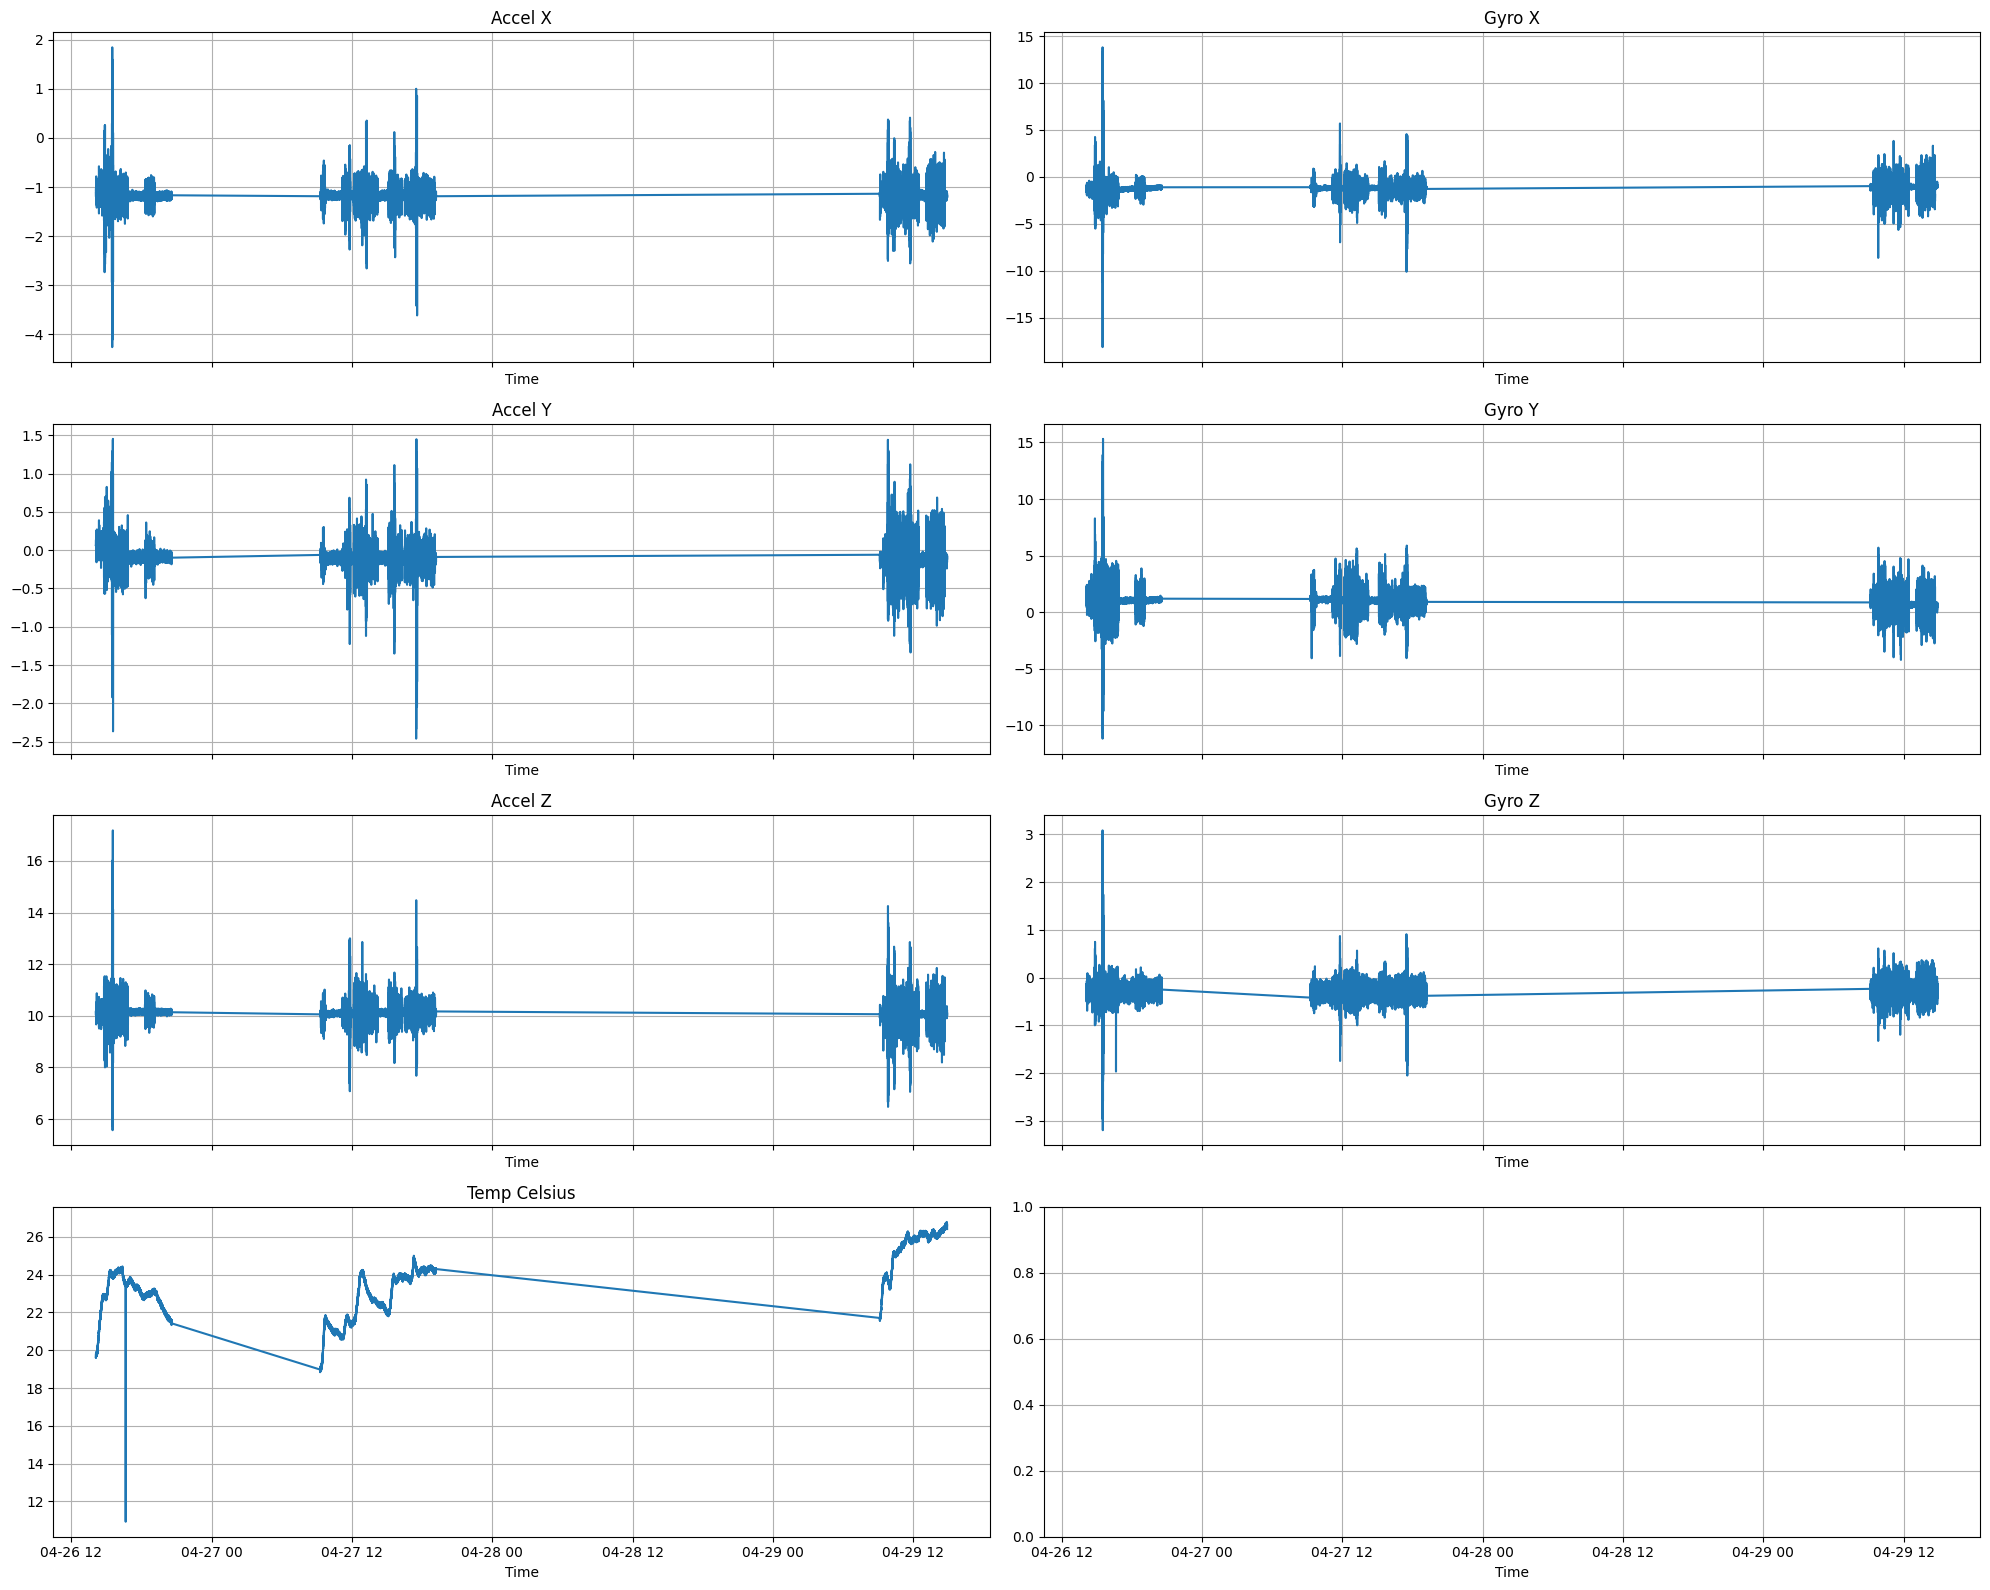

In [74]:
# import ast
# import json
time = sensor_data['received_at'].apply(pd.to_datetime)
accel_data = sensor_data['linear_accel'].apply(eval)
angular_data = sensor_data['angular_velocity'].apply(eval)
acc_x = [row['x'] for row in accel_data]
acc_y = [row['y'] for row in accel_data]
acc_z = [row['z'] for row in accel_data]
gyro_x = [row['x'] for row in angular_data]
gyro_y = [row['y'] for row in angular_data]
gyro_z = [row['z'] for row in angular_data]

fig, axs = plt.subplots(4, 2, figsize=(20, 16), sharex=True)
axs[0, 0].plot(time, acc_x)
axs[0, 0].set_title('Accel X')
axs[1, 0].plot(time, acc_y)
axs[1, 0].set_title('Accel Y')
axs[2, 0].plot(time, acc_z)
axs[2, 0].set_title('Accel Z')
axs[0, 1].plot(time, gyro_x)
axs[0, 1].set_title('Gyro X')
axs[1, 1].plot(time, gyro_y)
axs[1, 1].set_title('Gyro Y')
axs[2, 1].plot(time, gyro_z)
axs[2, 1].set_title('Gyro Z')
axs[3, 0].plot(time, sensor_data['temp'])
axs[3, 0].set_title('Temp Celsius')

for ax in axs.flat:
    ax.set_xlabel('Time')
    ax.grid(True)
plt.tight_layout()
plt.show()
# readings_frame = [row for row in sensor_data['angular_velocity'].apply(eval)]
# pd.Series(readings_frame).plot()
# display([row['y'] for row in sensor_data['angular_velocity'].apply(eval)])
#plt.figure(figsize=(10, 6))
#plt.scatter(time, sensor_data['temp'])
# plt.xticks(rotation=45)
# plt.gcf().autofmt_xdate()
#plt.xlabel('Time')
#plt.ylabel('Temp - Celsius')
#plt.title('Scatter Plot of Temp over Time')
#plt.show()